# Datenauswertung mit Python

In diesem Notebook lernen Sie wichtige Module und Funktionen zur Datenauswertung mit Python kennen. Sie können am Ende dieses Notebooks **Messdaten einlesen**, **Plots erstellen** und **stylen**, **verschiedene Funktionen** zum **Fitten** der Messergebnisse **verwenden** und anhand der Ergebnisse **Unsicherheiten bestimmen** und **angeben**. 

Die Verwendung und Bearbeitung von Jupyter-Notebooks sowie die Grundlagen zu Python haben Sie bereits in dem Einführungs-Notebook *Einführung_in_Python.ipynb* kennengelernt.

Starten Sie mit der Bearbeitung dieses Notebooks erst, wenn Sie das Experiment zum Federpendel abgeschlossen haben und sich die **Messergebnisse in dem selben Ordner** wie dieses Notebook **befinden**.

In [38]:
%run Hilfestellungen.py

## Inhaltsverzeichnis

- 1 [Start](#1-start)
- 2 [Parameter bestimmen](#2-parameter-bestimmen)
- 3 [Auswertung der Messungen bei veränderter Masse](#3-auswertung-der-messungen-bei-veränderter-masse)
- 4 [Bestimmung der Federkonstante](#4-bestimmung-der-federkonstante)
- [Anhang](#anhang)

# 1 Start

In diesem Abschnitt werden die Messdaten eingelesen und für die weitere Verwendung in Variablen gespeichert. Daraufhin wird ein erster Plot zur Visualisierung der zu beobachtenden Größen erstellt.

Zuerst muss das Paket importiert werden, welches die Funktion zum Einlesen der Daten liefert. Importieren Sie das Modul *numpy* als *np*.

In [39]:
# import numpy

# hier Code einfügen
# ---------- 

import numpy as np

# ---------- 

Anschließend können die Messdaten mit der Funktion [np.loadtxt()](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) als *numpy*-Array in Variablen gespeichert werden. Die relevanten Parameter sind der Dateiname als *string* (fname), das Trennzeichen (delimiter=*string*), die zu überspringenden Zeilen (skiprows=*interger*) und die zu verwendenden Spalten (usecols=*integer or list/tupel*). Zusätzlich kann mit dem Parameter *`unpack=True`* angegeben werden, dass Spalten und nicht Zeilen eingelesen werden sollen. <br>
Alle Parameter bis auf den Dateinamen sind optional und müssen nur angegeben werden, wenn z. B. das Trennzeichen innerhalb der Datei unterschiedlich zum `default`-Wert der `loadtxt()`-Funktion (whitespace) ist. Die Funktion gibt mit dem Parameter `unpack=True` *numpy*-Arrays in der From `[[Spalte1][Spalte2][Spalte3]...]` zurück.

Lesen Sie nun ihre Messdaten der 1. Messung ein und speichern Sie die Spalten in geeignete Variablen.

**Tipps:** 
- Überprüfen Sie Ihre `.csv`-Datei auf Trennzeichen und zu überspringenden Zeilen.
- Nutzen Sie *unpacking*, das Sie im Einführungs-Notebook (Abschnitt 2.3) kennengelernt haben.
- *strings* haben immer " " oder ' '


In [40]:
# einlesen der Daten in verschiedene Variablen:

# hier Code einfügen
# ---------- 

t,a_x,a_y,a_z,betrag_a = np.loadtxt('Messung unbekannte Masse/Nur Handy.csv',delimiter=',',skiprows=1, unpack=True)


# ---------- 

# Überprüfung Sie hier ihre Variablen
print(t,a_x,a_y,a_z,betrag_a)

[8.89520833e-03 1.88662083e-02 2.88382083e-02 ... 9.98047900e+00
 9.99045000e+00 1.00004220e+01] [-2.8504998  -3.05280644 -2.5393639  ...  0.17297277  0.17885302
  0.1643159 ] [2.52101943 3.34852323 5.67434272 ... 2.9089202  2.48514793 2.04488943] [ 0.19510404 -0.04967798 -0.08623123 ... -0.01674232 -0.04919613
 -0.07479406] [3.81037447 4.53152324 6.21723171 ... 2.91410649 2.49206117 2.05284355]


In [78]:
# Code für Hilfestellungen
button = widgets.Button(description="Hilfe anzeigen");button.on_click(h_einlesen);display(button);hilfe_output = None

Button(description='Hilfe anzeigen', style=ButtonStyle())

Zur Veranschaulichung sollen jetzt die auszuwertenden Daten geplottet werden.

Hierfür muss wieder zuerst das Modul mit den gewünschten Funktionen importiert werden. Importieren Sie das Modul *matplotlib.pyplot* als *plt*.

In [42]:
# import matplotlib

# hier Code einfügen
# ----------

import matplotlib.pyplot as plt

# ----------

Nun kann mit der Funktion [plt.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) ein Plot der gewünschten Größen erstellt werden. Die wichtigsten Parameter sind hier die x-Werte, die y-Werte, die Form der Punkte (`marker='o'`) und das Aussehen der Verbindung von Pukten (`linestyle=''`, leer für keine Verbindung der Punkte). Passende Werte für die Parameter finden Sie in der
Dokumentation von `plt.plot()`. Es gibt noch viele weitere Einstellungsmöglichkeiten wie Beschriftungen und Anpassungen der Achsen, welche jedoch erst bei dem endgültigen Plot am Ende der Auswertung gebraucht werden. Mit der Funktion [plt.minorticks_on()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.minorticks_on.html) werden die kleinen Skalenstriche angezeigt. Dies kann später bei der Parameterfindung helfen. Das Anzeigen des Koordinatengitters mit [plt.grid()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html) kann ebenfalls helfen.

Plotten Sie jetzt ihre Messdaten.

**Tipp**: Verwenden Sie `strg + F`, um einfacher im Browser die Parameter innerhalb der Dokumentationen zu finden.

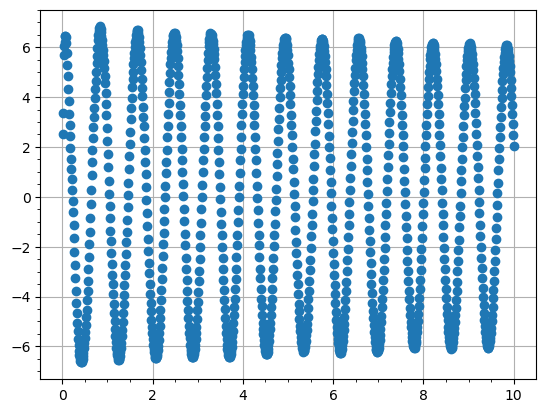

In [43]:
# einfacher Plot:

# hier Code einfügen
# ----------

plt.plot(t,a_y, marker='o', linestyle='')
plt.minorticks_on()
plt.grid()

# ----------

In [77]:
# Code für Hilfestellungen
button1 = widgets.Button(description="Hilfe anzeigen");button1.on_click(h_plotten);display(button1);hilfe_output = None

Button(description='Hilfe anzeigen', style=ButtonStyle())

Zu erkennen ist hier der sinusartige Verlauf der Beschleunigung des Handys am Federpendel. Da Sie am Ende dieses Notebooks die Federkonstante bestimmen sollen, müssen im nächsten Schritt die Parameter des Beschleunigungsverlaufs bestimmt werden.

# 2 Parameter bestimmen

Zur Bestimmung der Parameter (Amplitude, Frequenz, Phasenverschiebung) muss der Funktionsverlauf gefittet werden. Dazu wird zunächst die erwartete Funktion mit Variablen für die Parameter deklariert. <br>
Wie Funktionen definiert werden, haben Sie bereits im vorangehenden Einführungs-Notebook gelernt.

Deklarieren Sie nun die Funktion passend zum Verlauf der Beschleunigung beim Federpendel. Die Beschreibung der mechanischen Schwingung beim Federpendel von [LEIFIPhysik](https://www.leifiphysik.de/mechanik/mechanische-schwingungen/grundwissen/federpendel) kann Ihnen hier helfen.


**Tipp**: Mathematische Funktionen wie Sinus, Cosinus, etc. werden von numpy bereitgestellt und können mit `np.sin()` verwendet werden. Alle mathematischen numpy-Funktionen finden Sie hier: [Mathematische Funktionen](https://numpy.org/doc/stable/reference/routines.math.html)

In [45]:
# Deklaration der erwarteten Funktion:

# hier Code einfügen
# ----------

def federpendel(x,omega,amp,c):
    return -amp*np.cos(omega*x+c)

# ----------

In [76]:
# Code für Hilfestellungen
button2 = widgets.Button(description="Hilfe anzeigen");button2.on_click(h_function_def);display(button2);hilfe_output = None

Button(description='Hilfe anzeigen', style=ButtonStyle())

Die verwendete Optimierungsfunktion `optimize` zum Fitten Ihrer Messergebnisse ist Inhalt des Pakets *scipy* und muss zu Beginn importiert werden. Importieren Sie das Modul *optimize* aus dem Paket *scipy*.

In [47]:
# import scipy

# hier Code einfügen
# ----------

from scipy import optimize

# ----------

Um im nächsten Schritt die Parameter bestimmen zu können, müssen die Parameter vorerst abgeschätzt werden. Die Optimierungsfunktion durchläuft beim Anpassen der Parameter eine gewisse Anzahl an Annäherungsschritte. Durch die Komplexität der Funktion müssen die Parameter gut abgeschätzt werden. Hier ist vor allem die Schätzung der Winkelgeschwindigkeit wichtig. Bei einfacheren Funktionen müssen gegebenenfalls auch gar keine Parameter vorgegeben werden und die Funktion findet sie von selbst.

**Tipp**: Schauen Sie sich die Funktion und die relevanten Größen genau an. Hier kann Ihnen der Plot von gerade helfen. Umformungen wie Winkelgeschwindigkeit zu Periodendauer vereinfachen das Ablesen. Plotten Sie nach dem ersten Durchlauf die Funktion (Code-Zelle *Plot*) und betrachten Sie die Unterschiede zwischen Messung und Fit-Funktion. 

Probieren Sie ein paar Kombinationen aus. Dazu müssen Sie einfach die drei Code-Zellen (*Parameter schätzen*, *Optimierungsfunktion*, *Plot*) nach Änderung der Parameter neu ausführen.

In [48]:
# Parameter schätzen:

# Winkelgeschwindigkeit
guess_omega = 7.5

# Amplitude
guess_amp = 8

# Phasenverschiebung
guess_c = 2.5


In [ ]:
# Hilfestellung

Mit den überlegten Parametern kann jetzt die Optimierungsfunktion ausgeführt werden. <br>
Die Funktion [optimize.curve_fit()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) gibt zwei Arrays zurück. In `opt` werden die optimierten Parameter gespeichert und in `cov` die Kovarianzmatrix. In der Kovarianzmatrix sind auf der Hauptdiagonalen die Varianzen der in `opt` angegebenen Parameter zu finden. Dazu später mehr.

Der Optimierungsfunktion müssen folgende Parameter übergeben werden: `optimize.curve_fit(Funktion, x-Werte, y-Werte,geschätzte Parameter)` <br>
Die geschätzten Parameter werden dam Argument als Array mit der Syntax `p0=[guess1,guess2,guess3,...]` übergeben. Werden keine Ausgangsparameter übergeben, startet die Optimierungsfunktion mit dem default-Wert 1 bei allen Parametern.

Fitten Sie nun den Verlauf Ihrer Messdaten unter berücksichtigung Ihrer Paramterschätzungen.


**Tipp**: Vergessen Sie nicht den Rückgabewert der Funktion `curve_fit()` in den oben genannten Variablen zu speichern.

In [49]:
# Optimierungsfunktion

# hier Code einfügen
# ----------

opt, cov = optimize.curve_fit(federpendel,t , a_y,p0=[guess_omega, guess_amp,guess_c])


# ----------

# Überprüfung
print(opt)

[7.67497891 6.34380484 2.99351412]


In [ ]:
# Hilfestellung

Mit den durch die Optimierungsfunktion erhaltenen Parametern kann jetzt ein weiterer Plot mit der gefitteten Funktion erstellt werden. Falls die ermittelte Funktion kein Fit der Messwerte ist, müssen Sie die Parameter besser abgeschätzen.

Mit [plt.scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) können Sie zuerst die Messwerte und dann zusätzlich mit [plt.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) die Fit-Funktion darstellen. <br>
`plt.scatter(x,y)` benötigt als Parameter die x- und y-Werte der Messung. Zusätzlich kann mit `color=''` die Farbe und mit `s=` die Größe der Messpunkte vorgegeben werden.

Bei `plt.plot(x,function(x,y,z))` wird jetzt für die y-Werte die zu Beginn definierte Funktion mit den ermittelten Paramtetern übergeben. Wie Funktionen mit Parametern aufgerufen werden, haben Sie im Einführungs-Notebook gesehen. Es wurde ebenfalls bereits behandelt, wie Sie an einzelne Werte eines Arrays/einer Liste gelangen. Da die Fit-Funktion als Kurve angezeigt werden soll, sollte kein `marker=`-Parameter übergeben werden.

Plotten Sie jetzt die Messdaten zusammen mit der Funktion und überprüfen Sie, ob die Optimierungsfunktion die Parameter passend bestimmt hat.<br>

Der Plot kann hier auch für das Einfügen in den Versuchsbericht aufbereitet und exportiert werden (**sollte vorerst übersprungen werden**). Diese Zelle **soll** vorerst links am Rand durch klicken auf den Balken verkleinert werden.<br>

Das Wichtigste ist zunächst die Achsenbeschriftung. Diese kann mit den Funktionen [plt.xlabel("Beschriftung x-Achse")](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) und [plt.ylabel("Beschriftung y-Achse")](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) hinzugefügt werden. Für die Darstellung von mathematischen Ausdrücken nutzt *matplotlib* eine ähnliche Grammatik wie LaTeX. Die Formelblöcke werden mit `r"$$"`abgegrenzt. Innerhalb der Dollarzeichen `$$` kann LaTeX Code genutzt werden. So wird aus `r"$\frac{m}{s^2}$"` in *matplotlib* $\frac{m}{s^2}$. Mehr dazu finden Sie hier: [mathtext](https://matplotlib.org/stable/tutorials/text/mathtext.html).<br>

Damit nichts abgeschnitten wird, muss die Funktion [plt.tight_layout()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html) **am Ende** des *stylings* hinzugefügt werden.

Die Abbildung kann dann abschließend mit [plt.savefig("Name.png")](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) gespeichert werden. Die Datei wird im selben Verzeichnis erstellt.

Weitere wichtige Funktionen:
- [plt.legend("position")](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html): Fügt eine Legende an der angegebenen Position ein. *string* könnten sein: best, upper right, center left, etc.<br>
- [plt.xlim(x1,x2)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html): Legt den Bereich der x-Achse fest. Übergeben wird der Bereich mit x1,x2.<br>
- [plt.ylim(y1,y2)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html): Analog zu `xlim`.<br>
- [plt.title("Titel")](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html): Fügt einen Titel ein. Der gewünschte Titel wird als *string* übergeben.<br>
- [plt.text(x,y,"Text",color="",fontsize=)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html): Fügt einen Text an dem Punkt (x,y) in das Diagramm ein. Übergeben wird die Position als *float* und der Text als *string*.<br>
- [plt.grid()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html): Zeigt das Gitternetz an.<br>
- [plt.xticks()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html): Hier können die Ticks der x-Achse explizit angepasst werden. Analog `yticks()` für die y-Achse.<br>

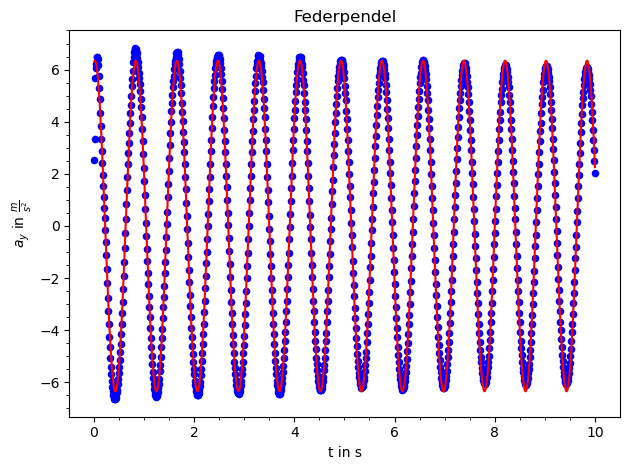

In [50]:
# Plot mit optimierter Funktion

# hier Code einfügen
# ----------

plt.scatter(t, a_y, s=20,color="blue", label="Messung")
plt.plot(t, federpendel(t, opt[0], opt[1], opt[2]),color="red", label="Funktion")
plt.minorticks_on()


# Styling:

plt.xlabel("t in s")
plt.ylabel(r"$a_{y}$" + " in " + r"$\frac{m}{s^2}$")
#plt.xlim(-0.5, 12)
#plt.ylim(-0.5, 12)
#plt.legend(loc="right")
plt.title("Federpendel")

plt.tight_layout()

# Export:

plt.savefig("messung1.png")

# ----------

Wenn eine passende Funktion gefunden wurde, kann jetzt mit der Kovarianzmatrix `cov` die Unsicherheit auf die optimierten Parameter bestimmt werden. Wie oben bereits beschrieben gibt die Hauptdiagonale der Kovarianzmatrix die Varianzen $\sigma^2$ unserer Parameter an. Die Unsicherheit erhalten Sie also mit der Wurzel der Varianz: $u=\sigma=\sqrt{\sigma^2}$.

Berechnen Sie nun die Unsicherheit für alle Parameter und speichern diese in einem Array.

**Tipp**: numpy bietet die Funktion [np.sqrt()](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) zur Berechnung einer Wurzel und zusätzlich die Funktion [np.diag()](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) zur Bestimmung der Hauptdiagonalen eines Arrays. `np.diag()` gibt ein eindimensionales Array mit den Werten der Diagonalen zurück.

In [51]:
# Unsicherheit auf ermittelte Parameter

# hier Code einfügen
# ----------

err = np.sqrt(np.diag(cov))

# ----------

# Überprüfung 
print(err)

[0.00054423 0.00985891 0.00313474]


In [ ]:
# Hilfestellung

Mit dem Paket uncertainties können jetzt die Parameter und die dazugehörigen Unsicherheiten in einer Variable gespeichert werden. Bei Berechnungen mit der neuen Variable werden automatisch auch die Unsicherheiten berechnet. Dies beinhaltet auch die Fehlerfortpflanzung bei mehreren fehlerbehafteten Größen. 

Zuerst müssen dafür wieder alle benötigten Pakete installiert werden. Importieren Sie aus dem Paket *uncertainties* das Modul *ufloat*. Importieren Sie dann aus dem Modul *uncertainties.umath* alle Funktionen (*). Abschließend müssen Sie noch aus dem Paket *uncertainties* das Modul *unumpy* als *unp* importieren. 

**Tipp:**

In [52]:
# import Funktionen aus uncertainties 

# hier Code einfügen
# ----------

from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp

# ----------

Das Paket [uncertainties](https://pythonhosted.org/uncertainties/user_guide.html) bietet mit der Funktion `ufloat(Beswert, Unsicherheit)` eine Möglichkeit, ein Tupel aus Bestwert und Unsicherheit in einer Variable der Form $Bestwert \pm Unsicherheit$ zu speichern. Die Code-Zeile könnte dann so aussehen: `länge = ufloat(1.005, 0.512)` mit dem Ergebnis von `print(länge)`: $1.0 \pm 0.5$. Wie man an dem Beispiel erkennt, werden bei der Ausgabe Bestwert und Unsicherheit direkt auf die signifikanten Stellen gerundet.<br>
Rechnet Sie nun mit diesen Variablen weiter rechnen, wird durch *uncertainties* automatisch unter Berücksichtigung der Gauß'schen Fehlerfortpflanzung die Unsicherheit bestimmt. Wie mit *ufloats* gerechnet wird, werden Sie später noch näher kennenlernen.

Speichern Sie jetzt jeden Parameter zusammen mit der dazugehörigen Unsicherheiten in einer *ufloat*-Variable ab.

**Tipp**: Hier müssen Sie wieder einzelne Elemente aus einem Array auslesen.

In [53]:
# Speichern der Parameter als ufloat

# hier Code einfügen
# ----------

omega = ufloat(opt[0], err[0])
amp = ufloat(opt[1], err[1])
phi = ufloat(opt[2], err[2])
# ----------


# Überprüfung 
print(omega, amp, phi)


7.6750+/-0.0005 6.344+/-0.010 2.9935+/-0.0031


In [ ]:
# Hilfestellung

Jetzt haben Sie für eine Ihrer Messungen die unbekannten Parameter Kreisfrequenz $\omega$, Amplitude $\hat{a}$ und Phasenverschiebung $\phi$ der Funktion $a(t)=-\hat{a}\cdot cos(\omega \cdot t+\phi)$ bestimmt. Im nächsten Teil werden Sie bei den Messungen mit unterschiedlichen Massen ebenfalls die Parameter ermitteln und anschließend über die Massen und Kreisfrequenzen die Federkonstante bestimmen.

# 3 Auswertung der Messungen bei veränderter Masse

In diesem Teil werden die Parameter der restlichen Messungen bestimmt. Erzeugen Sie hierfür eigene Code-Zellen unterhalb dieser Markdown-Zelle und bestimmen die Parameter $\omega$, $\hat{a}$ und $\phi$ für die fehlenden Messungen. Speichern Sie die Parameter dann wieder zusammen mit Ihren Unsicherheiten in *ufloat*-Variablen.

Führen Sie jetzt selbstständig alle Auswertungsschritte für die restlichen Messungen aus. Wiederholen Sie dafür die bereits durchgeführte Auswertung der 1. Messung in neuen Code-Zellen.

**Tipps**:
- Nutzen Sie den Code der ersten Auswertung und ändern Sie die Namen der Variablen passend: `a_y` -> `a_y2` -> `a_y3`. <br>
- Wenn Sie die selben Varibalen verwenden, müssen Sie darauf achten, dass die Code-Zellen in chronologischer Reihenfolge ausgeführt werden, da sonst Daten zwischen einzelnen Schritten überschrieben werden könnten. Hier hilft Ihnen `Run All` oben in der Menüleiste.<br>
- Es müssen keine imports wiederholt und auch keine Funktionen neu definiert werden.
- Alle Auswertungsschritte können auch in einer einzigen Zelle durchgeführt werden. Dabei sollte jedoch die Nachvollziehbarkeit im Vordergrund stehen. Kommentieren Sie einzelne Abschnitte mit `#Kommentar`, um die Übersicht zu behalten.<br>
- Die einzelnen Messungen unterscheiden sich. Die Parameterschätzungen müssen gegebenenfalls angepasst werden.
- Mit [plt.subplot(ZeilenSpaltenNummer)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) können mehrere Diagramme geplotten werden. Ein Beispiel dafür finden Sie im [Anhang](#anhang).



---

Musterlösung:

In [54]:
# Import aller Messungen

t2,a_x2,a_y2,a_z2,betrag_a2 = np.loadtxt('Messung unbekannte Masse/1.csv',delimiter=',',skiprows=1, unpack=True)
t3,a_x3,a_y3,a_z3,betrag_a3 = np.loadtxt('Messung unbekannte Masse/2.csv',delimiter=',',skiprows=1, unpack=True)
t4,a_x4,a_y4,a_z4,betrag_a4 = np.loadtxt('Messung unbekannte Masse/3.csv',delimiter=',',skiprows=1, unpack=True)
t5,a_x5,a_y5,a_z5,betrag_a5 = np.loadtxt('Messung unbekannte Masse/4.csv',delimiter=',',skiprows=1, unpack=True)
t6,a_x6,a_y6,a_z6,betrag_a6 = np.loadtxt('Messung unbekannte Masse/5.csv',delimiter=',',skiprows=1, unpack=True)

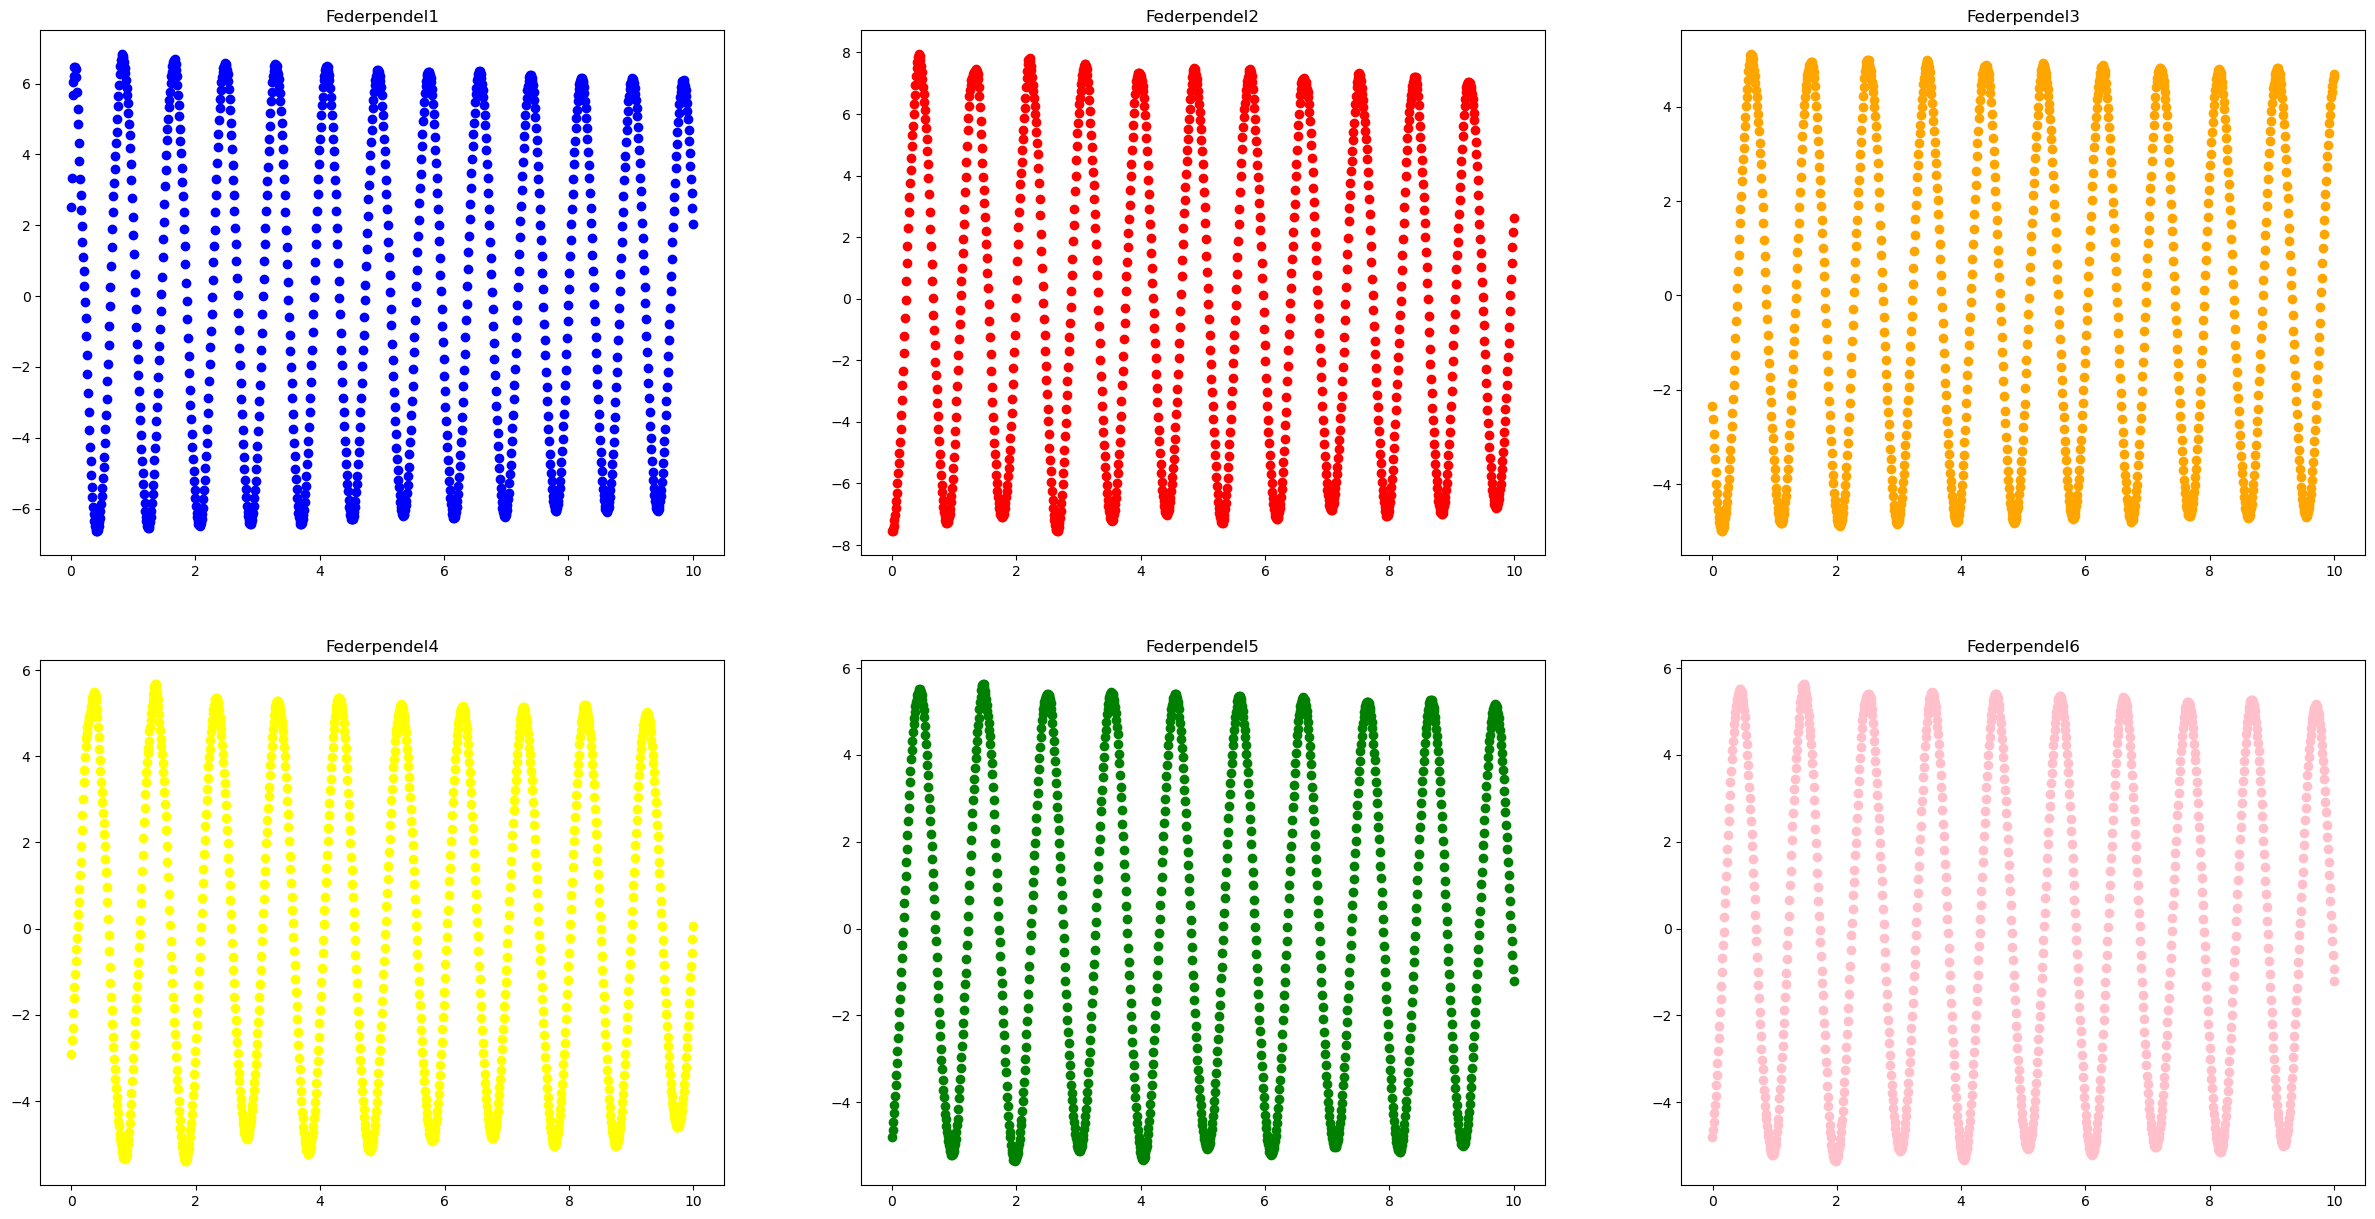

In [55]:
# Überprüfung und Darstellung aller Messungen

plt.rcParams["figure.figsize"] = (30,15)

plt.subplot(231)
plt.title("Federpendel1")
plt.plot(t, a_y,marker='o', linestyle='', color="blue")

plt.subplot(232)
plt.title("Federpendel2")
plt.plot(t2,a_y2, marker='o', linestyle='', color="red")

plt.subplot(233)
plt.title("Federpendel3")
plt.plot(t3,a_y3, marker='o', linestyle='', color="orange")

plt.subplot(234)
plt.title("Federpendel4")
plt.plot(t4,a_y4, marker='o', linestyle='', color="yellow")

plt.subplot(235)
plt.title("Federpendel5")
plt.plot(t5,a_y5, marker='o', linestyle='', color="green")

plt.subplot(236)
plt.title("Federpendel6")
plt.plot(t5,a_y5, marker='o', linestyle='', color="pink")

plt.show()


plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

[ 7.11323249  7.26774537 -0.04263035] [0.00042385 0.0089697  0.00246044]
7.1132+/-0.0004 7.268+/-0.009 -0.0426+/-0.0025


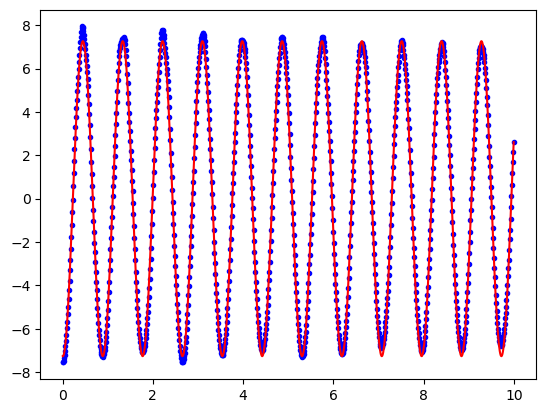

In [56]:
# Auswertung der Messung 2

plt.scatter(t2, a_y2, s=9,color="blue")

# Parameter schätzen:
guess_omega = 7
guess_amp = 8
guess_c = 1



opt, cov = optimize.curve_fit(federpendel,t2 , a_y2,p0=[guess_omega, guess_amp,guess_c])

err = np.sqrt(np.diag(cov))

print(opt, err)

plt.plot(t2, federpendel(t2, opt[0], opt[1], opt[2]),color="red")

omega2 = ufloat(opt[0], err[0])
amp2 = ufloat(opt[1], err[1])
phi2 = ufloat(opt[2], err[2])

print(omega2, amp2, phi2)

[ 6.69480152 -4.84037309  2.02344387] [0.0002702  0.00374523 0.00156775]
6.69480+/-0.00027 -4.840+/-0.004 2.0234+/-0.0016


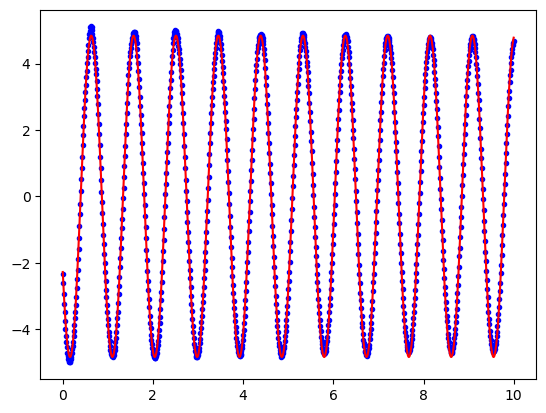

In [57]:
# Auswertung 3

plt.scatter(t3, a_y3, s=9,color="blue")

# Parameter schätzen:
guess_omega = 7
guess_amp = 8
guess_c = 1



opt, cov = optimize.curve_fit(federpendel,t3 , a_y3,p0=[guess_omega, guess_amp,guess_c])

err = np.sqrt(np.diag(cov))

print(opt, err)

plt.plot(t3, federpendel(t3, opt[0], opt[1], opt[2]),color="red")

omega3 = ufloat(opt[0], err[0])
amp3 = ufloat(opt[1], err[1])
phi3 = ufloat(opt[2], err[2])

print(omega3, amp3, phi3)

[6.3552945  5.13881537 0.90686323] [0.00050817 0.00767004 0.00292413]
6.3553+/-0.0005 5.139+/-0.008 0.9069+/-0.0029


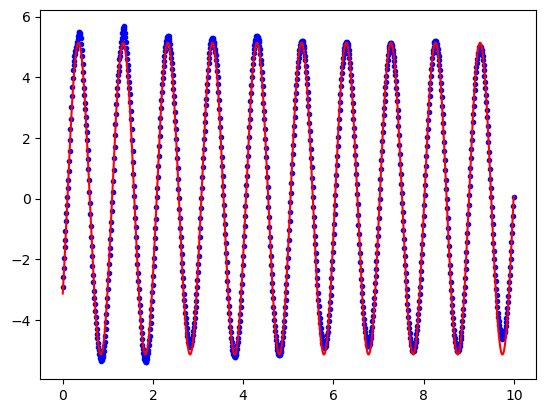

In [58]:
# Auswertung 4

plt.scatter(t4, a_y4, s=9,color="blue")

# Parameter schätzen:
guess_omega = 6
guess_amp = 8
guess_c = 1



opt, cov = optimize.curve_fit(federpendel,t4 , a_y4,p0=[guess_omega, guess_amp,guess_c])

err = np.sqrt(np.diag(cov))

print(opt, err)

plt.plot(t4, federpendel(t4, opt[0], opt[1], opt[2]),color="red")

omega4 = ufloat(opt[0], err[0])
amp4 = ufloat(opt[1], err[1])
phi4 = ufloat(opt[2], err[2])

print(omega4, amp4, phi4)

[6.10345008 5.26162769 0.45954842] [0.00031836 0.00494169 0.00184089]
6.10345+/-0.00032 5.262+/-0.005 0.4595+/-0.0018


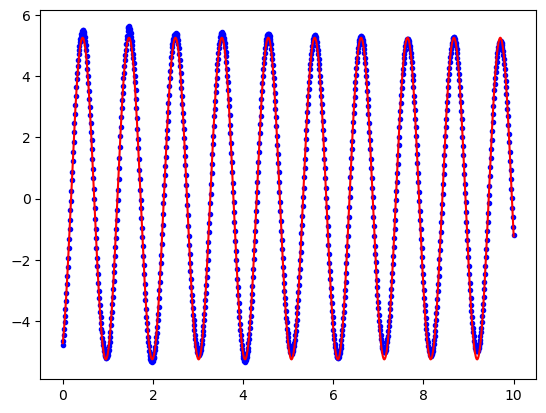

In [59]:
# Auswertung 5

plt.scatter(t5, a_y5, s=9,color="blue")

# Parameter schätzen:
guess_omega = 6
guess_amp = 8
guess_c = 1



opt, cov = optimize.curve_fit(federpendel,t5, a_y5,p0=[guess_omega, guess_amp,guess_c])

err = np.sqrt(np.diag(cov))

print(opt, err)

plt.plot(t5, federpendel(t5, opt[0], opt[1], opt[2]),color="red")

omega5 = ufloat(opt[0], err[0])
amp5 = ufloat(opt[1], err[1])
phi5 = ufloat(opt[2], err[2])

print(omega5, amp5, phi5)

[5.92019875 3.6092579  1.13588881] [0.00023382 0.00242854 0.00133424]
5.92020+/-0.00023 3.6093+/-0.0024 1.1359+/-0.0013


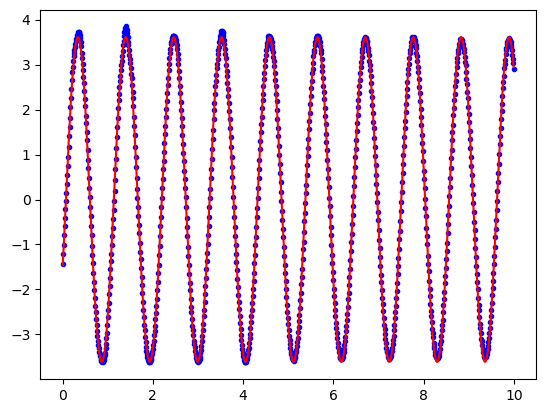

In [60]:
# Auswertung 6

plt.scatter(t6, a_y6, s=9,color="blue")

# Parameter schätzen:
guess_omega = 6
guess_amp = 8
guess_c = 1



opt, cov = optimize.curve_fit(federpendel,t6 , a_y6,p0=[guess_omega, guess_amp,guess_c])

err = np.sqrt(np.diag(cov))

print(opt, err)

plt.plot(t6, federpendel(t6, opt[0], opt[1], opt[2]),color="red")

omega6 = ufloat(opt[0], err[0])
amp6 = ufloat(opt[1], err[1])
phi6 = ufloat(opt[2], err[2])

print(omega6, amp6, phi6)

Ende der Musterlösung

---

# 4 Bestimmung der Federkonstante 

Die Federkonstante kann durch den Zusammenhang $\omega=\sqrt{\frac{D}{m}}$ bestimmt werden. *D* ist die gesuchte Federkonstante und *m* die Masse, die an der Feder hängt. Die einfachste Möglichkeit die Federkonstante *D* zu bestimmen, ist mit Hilfe einer linearen Funktion. Es können die bekannten Größen so umgerechnet werden, dass die Federkonstante *D* der Steigung der linearen Funktion entspricht. Das Prozedere wird *Linearisierung* genannt. 

Linearisieren Sie die Funktion $\omega=\sqrt{\frac{D}{m}}$ so, dass sie der Form einer linearen Gleichung $y = D * x$ entspricht. 


Sie sollten Ihre Massen und Kreisfrequenzen zusammen mit Ihren Unsicherheiten in Arrays speichern, damit nicht jeder Wert einzeln umgerechnet werden muss. Da das Paket *uncertainties* die Berechnung der Unsicherheiten übernimmt, sollten diese Arrays aus *ufloats* bestehen. <br> 
Es gibt zwei Möglichkeiten *ufloats* in einem Array zu speichern:
1. Die Zahl liegt bereits als *ufloat* vor (bei uns die Kreisfrequenzen): `name = np.array([ufloat1,ufloat2,...])`
2. Es liegen Bestwert und Unsicherheit als einzelne Arrays vor: `name = unp.uarray(liste_bestwert,liste_unsicherheit)`

Mehr dazu finden Sie hier: [Uncertainties in arrays](https://pythonhosted.org/uncertainties/numpy_guide.html)

Speichern Sie nun die ermittelten Kreisfrequenzen mit ihren Unsicherheiten in einem *ufloat*-Array.

In [61]:
# Kreisfrequenzen in *ufloat*-Array

# hier Code einfügen
# ----------

kreisfrequenzen = np.array([omega,omega2,omega3,omega4,omega5,omega6])

# ----------

print(kreisfrequenzen)

[7.674978907009603+/-0.0005442320783449063
 7.11323248760888+/-0.0004238465632705321
 6.694801520192088+/-0.00027020348218427564
 6.355294497105164+/-0.0005081706235269259
 6.103450077450551+/-0.0003183614695786666
 5.92019875203063+/-0.00023381568670782186]


Es müssen zusätzlich noch die einzelnen Massen zusammen mit ihren Unsicherheiten in einem Array gespeichert werden. Definieren Sie zuerst für jede Masse eine eigene Variable. Das Gewicht der Massenstücke ist mit $(0,026\pm0,006) kg$ angegeben. Berechnen Sie nun für jede Masse die passende Unsicherheit und legen diese in einer zusätzlichen Variable ab. Anschließend sollen zwei Listen, eine mit den Massen und eine mit den Unsicherheiten, erstellt werden. <br> 

Die Unsicherheit berechnet sich über die Gauß'sche Fehlerfortpflanzung. Stellen Sie die Gleichung der Gauß'schen Fehlerfortpflanzung für die Addition von fehlerbehafteten Größen auf. Die Funktion zur Berechnung der Massen sieht wie folgt aus: 

Nur Smartphone: $m_{gesamt} = m_s + 0 \cdot m_{massenstück}$ <br>
Smartphone mit einem Massenstück: $m_{gesamt} = m_{smartphone} + 1 \cdot m_{massenstück}$ <br>
Smartphone mit zwei Massenstücken: $m_{gesamt} = m_{smartphone} + 2 \cdot m_{massenstück}$ <br>
... <br>

**Tipps:** 
- Die Berechnung der Unsicherheit mit der Gauß'schen Fehlerfortpflanzung finden Sie in der Praktikumsanleitung unter Versuch *MEDA* Kapitel 1.2.3 *Fortpflanzung der Messabweichung (Gauß’sche Fehlerfortpflanzung)*.
- Fragen Sie bei Schwierigkeiten Ihre Versuchsbetreuerin oder Ihren Versuchsbetreuer nach Hilfe. 

Nutzen Sie die Code-Zelle zur Berechnung der Werte.

Liegen für die Massen und Unsicherheiten Variablen vor, können Sie diese jetzt jeweils in Listen speichern. Nutzen Sie anschließend die *uarray*-Methode von unumpy, um die beiden Listen (Massen und Unsicherheiten) in einem *uflaot*-Array zu speichern.

**Tipp:** Rechnen Sie in SI-Einheiten. Vergessen Sie nicht, dass auch die Messung des Gewichts des Smartphones eine Unsicherheit besitzt.


Berechnen Sie nun alle Massen und die dazugehörigen Unsicherheiten. Legen Sie anschließend die Massen mit ihren Unsicherheiten in einem *ufloat*-Array ab.

In [62]:
# Berechnung der Massen und ihre Unsicherheiten und Speicherung in ufloat-Array

# hier Code einfügen
# ----------

m_stück = 0.026
u_stück = 0.006

# Massen

m_1 = 0.1829
m_2 = m_1 + 1 * m_stück
m_3 = m_1 + 2 * m_stück
m_4 = m_1 + 3 * m_stück
m_5 = m_1 + 4 * m_stück
m_6 = m_1 + 5 * m_stück

masses = [m_1,m_2,m_3,m_4,m_5,m_6]

# Unsicherheiten

u_m1 = np.sqrt(0*(u_stück**2)+0.001**2)
u_m2 = np.sqrt(1*(u_stück**2)+0.001**2)
u_m3 = np.sqrt(2*(u_stück**2)+0.001**2)
u_m4 = np.sqrt(3*(u_stück**2)+0.001**2)
u_m5 = np.sqrt(4*(u_stück**2)+0.001**2)
u_m6 = np.sqrt(5*(u_stück**2)+0.001**2)

u_masses = [u_m1,u_m2,u_m3,u_m4,u_m5,u_m6]

# Speichern in ufloat-Array

massen = unp.uarray(masses,u_masses)

# ----------


print(massen)

[0.1829+/-0.001 0.2089+/-0.00608276253029822 0.2349+/-0.008544003745317531
 0.2609+/-0.010440306508910549 0.2869+/-0.012041594578792296
 0.3129+/-0.01345362404707371]


In [ ]:
# Hilfestellung

Es sollten nun zwei *ufloat*-Arrays mit den Kreisfrequenzen und den Massen vorliegen.<br>
Aufgrund der Linearisierung müssen die Kreisfrequenzen und Massen noch umgerechnet werden. Berechnungen auf *ufloat*-Arrays berücksichtigen die Fehlerfortpflanzung.

Bestimmen Sie nun die neuen Arrays für die Kreisfrequenz und Masse, sodass die Form $f_1(\omega) = D * f_2(m)$ gegeben ist. Die beiden neuen Arrays entsprechen $f_1$ und $f_2$.

In [63]:
# Umrechnung passend zur Linearisierung

# hier Code einfügen
# ----------

massen_inv = 1/massen

kreisfrequenzen_quad = kreisfrequenzen**2

# ----------

# print()

Nun können Sie die Ergebnisse grafisch darstellen. Die Auftragung der Bestwerte und der Fehlerbalken geschieht in seperaten Funktionen des Moduls *matplotlib*. Für den Plot benötigen Sie jeweils für die x- und y-Achse ein Array mit den Bestwerten und für die Fehlerbalken die zugehörigen Unsicherheiten. Das Paket *uncertainties* liefert für diesen Zweck die zwei folgenden Funktionen:

```py
unp.nominal_values(ufloat_array)    # Bestwerte
unp.std_devs(ufloat_array)          # Unsicherheiten
```

Deklarieren Sie nun für die umgerechneten Arrays (Kreisfrequenzen und Massen) jeweils zwei neue Arrays für den Bestwert und die Unsicherheit.

In [64]:
# seperate Speicherung von Bestwert und Unsicherheit

# hier Code einfügen
# ----------

massen_inv_val = unp.nominal_values(massen_inv)
massen_inv_err = unp.std_devs(massen_inv)


kreisfrequenzen_quad_val = unp.nominal_values(kreisfrequenzen_quad)
kreisfrequenzen_quad_err = unp.std_devs(kreisfrequenzen_quad)

# ----------

# print()

Den Plot erstellen Sie wie bereits bekannt mit `plt.plot()`. Für die Fehlerbalken bietet *matplotlib* die Funktion [plt.errorbar(x, y, xerr=array, yerr=array)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html). Der Funktion können ähnliche Argumente wie `plt.plot()` übergeben werden. Dem Argument *xerr* bzw. *yerr* muss das Array der jeweiligen Unsicherheit übergeben werden. Ohne das leere *linestyle*-Argument verbindet die *errorbar*-Funktion die einzelnen Fehlerbalken.

Erstellen Sie nun den Plot der linearisierten Messergebnisse mit den dazugehörigen Unsicherheiten. Im nächsten Schritt wird der Verlauf gefittet und so die Steigung bestimmt.

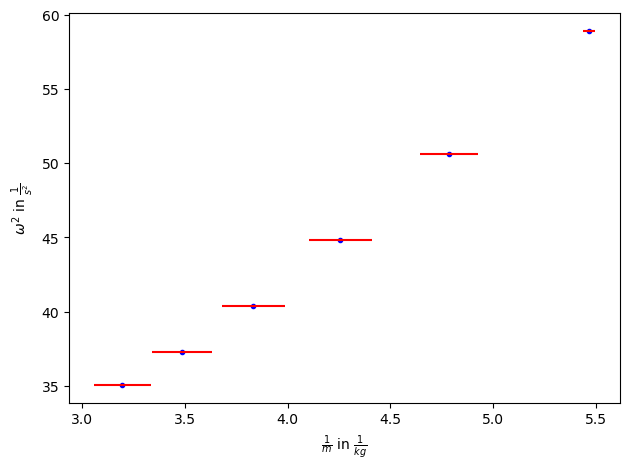

In [65]:
# seperate Speicherung von Bestwert und Unsicherheit

# hier Code einfügen
# ----------

plt.plot(massen_inv_val,kreisfrequenzen_quad_val,marker="o",linestyle="",color="blue", markersize=3)
plt.errorbar(massen_inv_val,kreisfrequenzen_quad_val,xerr=massen_inv_err,yerr=kreisfrequenzen_quad_err,linestyle='', color="red")

plt.xlabel(r"$\frac{1}{m}$"+" in "+r"$\frac{1}{kg}$")
plt.ylabel(r"$\omega^2$" + " in " + r"$\frac{1}{s^2}$")
plt.tight_layout()
# ----------

In [ ]:
# Hilfestellung

Zum Fitten der Messdaten können Sie nun wieder die Funktion [optimize.curve_fit()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) des Moduls *scipy* verwenden.

- Definieren Sie dafür eine neue Funktion gemäß des Verlaufs ihrer Messdaten und bestimmen anschließend die Steigung und ihre Unsicherheit mit Hilfe der Optimierungs-Funktion von *scipy*. <br>
- Speichern Sie das Ergbnis für die Federkonstante zusammen mit ihrer Unsicherheit in eine *ufloat*-Variable. <br> 
- Plotten Sie anschließend die gefittete Funktion zusammen mit den Datenpunkten und ihren Fehlerbalken.

**Tipp:** Vergessen Sie nicht den y-Achsenabschnitt als Parameter in ihrer Funktion.

In [66]:
# Definition der Funktion
# hier Code einfügen
# ----------

def linear(x,m,b):
    return m*x+b

# ----------

In [67]:
# Optimierungsfunktion

# hier Code einfügen
# ----------

opt, cov = optimize.curve_fit(linear,massen_inv_val, kreisfrequenzen_quad_val,p0=[1,1])
err = np.sqrt(np.diag(cov))

d = ufloat(opt[0],err[0])

# ----------

print(d)

10.6+/-0.4


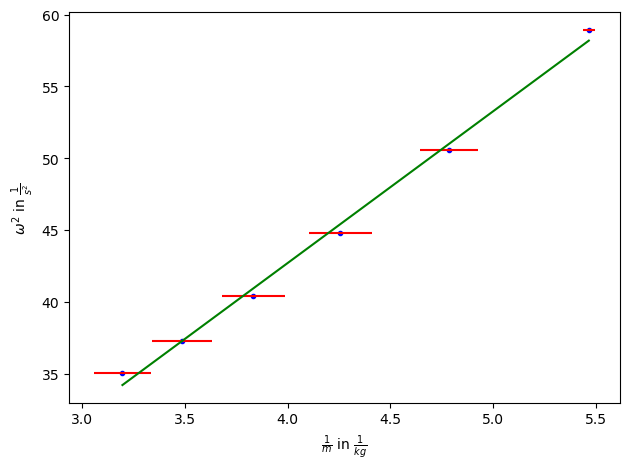

In [68]:
# Plot der Fit-Funktion mit Datenpunkten und zugehörigen Fehlerbalken

# hier Code einfügen
# ----------

plt.plot(massen_inv_val,kreisfrequenzen_quad_val,marker="o",linestyle="",color="blue", markersize=3)
plt.errorbar(massen_inv_val,kreisfrequenzen_quad_val,xerr=massen_inv_err,yerr=kreisfrequenzen_quad_err,linestyle='', color="red")
plt.plot(massen_inv_val, linear(massen_inv_val,opt[0],opt[1]),color="green")

plt.xlabel(r"$\frac{1}{m}$"+" in "+r"$\frac{1}{kg}$")
plt.ylabel(r"$\omega^2$" + " in " + r"$\frac{1}{s^2}$")
plt.tight_layout()

# ----------

Ihnen sollte aufgefallen sein, dass der Optimierungsfunktion keine Unsicherheiten übergeben wurden. Es ist möglich der Optimierungsfunktion mit dem Argument `sigma=array` die Unsicherheit in y-Richtung zu übergeben, jedoch nicht in x-Richtung. Sind wie in unserem Fall die x- und y-Werte fehlerbehaftete Größen, muss eine andere Fit-Funktion verwendet werden. Dafür eignet sich das Verfahren *Orthogonal Distance Regression* (ODR). Bei diesem Verfahren kann die Unsicherheit in x- und y-Richtung berücksichtigt werden. Das Paket *scipy* bietet hierfür das Modul *odr*. 

Importieren Sie aus *scipy.odr* die Funktionen *ODR*, *Model* und *RealData*.

In [69]:
# Import von scipy-Funktionen

# hier Code einfügen
# ----------

from scipy.odr import ODR, Model, RealData

# ----------

Für die Verwendung von *odr* muss zu Beginn eine neue Funktion definiert werden. *odr* erwartet eine Liste der unbekannten Parameter. Das heißt die Paramter der neuen Funktion sind jetzt *beta* (Liste der unbekannten Parameter: Steigung und Y-Achsenabschnitt) und *x* (bekannte x-Werte). Innerhalb der Funktion wird die Steigung als `beta[0]` und der Y-Achsenabschnitt als `beta[1]` ersetzt. Der Rückgabewert sowie *x* bleiben gleich. 

Definieren Sie nun eine neue Funktion anhand des Verlaufs der Datenpunkte.

**Tipp:** Orientieren Sie sich an der bereits definierten Funktion und ändern nur die unbekannten Parameter.

In [70]:
# Definition der Funktion mit Liste als Parameter

# hier Code einfügen
# ----------

def lin(beta,x):
    y = beta[1] + beta[0]*x
    return y

# ----------

In [ ]:
# Hilfestellung

Die Verwendung von *odr* ist vergleichsweise kompliziert und kann hier nachgelesen werden: [Orthogonal distance regression (scipy.odr)](https://docs.scipy.org/doc/scipy/reference/odr.html). <br>

Folgen Sie den Schritten der Dokumentation ab *Basic usage*.


In [71]:
# ODR

# hier Code einfügen
# ----------

model = Model(lin)
data = RealData(massen_inv_val,kreisfrequenzen_quad_val,sx=massen_inv_err,sy=kreisfrequenzen_quad_err)
odr = ODR(data,model,[1,1])
out = odr.run()
out.pprint()

# ----------


Beta: [10.92663614 -0.87814551]
Beta Std Error: [0.24675626 1.29175629]
Beta Covariance: [[ 0.21543026 -1.11931082]
 [-1.11931082  5.90379862]]
Residual Variance: 0.28263740284538114
Inverse Condition #: 0.02000429235223331
Reason(s) for Halting:
  Sum of squares convergence


In [ ]:
# Hilfestellung

Mit den Methoden `myoutput.beta` und `myoutput.sd_beta` erhalten Sie den Bestwert und die Unsicherheit der beiden unbekannten Parameter. Speichern Sie nun das Ergebnis für die Federkonstante zusammen mit ihrer Unsicherheit in eine *ufloat*-Variable.

In [72]:
# Ergebnis in ufloat

# hier Code einfügen
# ----------

beta = out.beta
beta_err = out.sd_beta

d_odr = ufloat(beta[0],beta_err[0])

# ----------

print(d_odr)

10.93+/-0.25


Zum Vergleich beider Methoden können Sie jetzt die neue Funktion, welche die mit *ODR* bestimmten Parameter beinhaltet, dem Plot mit der Optimierungsfunktion hinzufügen. Kopieren Sie dazu einfach die Zeilen für die Plots der Datenpunkte, Fehlerbalken und Optimierungsfunktion und ergänzen diese mit einem weiteren Plot für die *ODR*-Funktion.

Erstellen Sie nun den abschließenden Plot mit Messdaten, Fehlerbalken und beiden Fit-Funktionen.

**Tipps:**
- Mit dem Argument `color=""` können die Farben der Plots angepasst werden.
- Mit dem Argument `label=""` kann den Plots der Funktionen eine Bezeichnung gegeben werden und anschließend mit `plt.legend()` eine Legende hinzugefügt werden.

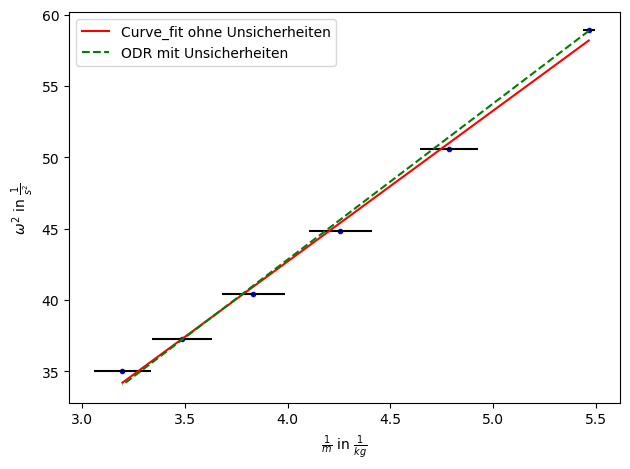

In [73]:
# Plot beider Funktionen und Datenpunkte mit Fehlerbalken 

# hier Code einfügen
# ----------

plt.plot(massen_inv_val,kreisfrequenzen_quad_val,marker="o",linestyle="",color="blue", markersize=3)
plt.errorbar(massen_inv_val,kreisfrequenzen_quad_val,xerr=massen_inv_err,yerr=kreisfrequenzen_quad_err,linestyle='', color="black")
plt.plot(massen_inv_val, linear(massen_inv_val,opt[0],opt[1]),color="red", label="Curve_fit ohne Unsicherheiten")
plt.plot(massen_inv_val, lin(beta, massen_inv_val),color="green",linestyle="--",label="ODR mit Unsicherheiten")

plt.xlabel(r"$\frac{1}{m}$"+" in "+r"$\frac{1}{kg}$")
plt.ylabel(r"$\omega^2$" + " in " + r"$\frac{1}{s^2}$")
plt.legend()
plt.tight_layout()

# ----------


Sie können abschließend die beiden Ergebnisse für die Federkonstante vergleichen.

In [74]:
# Vergleich Ergebnisse

# hier Code einfügen
# ----------
print(d, d_odr)
# ----------

10.6+/-0.4 10.93+/-0.25


---

# Anhang

Subplots erstellen:

```py
plt.rcParams["figure.figsize"] = (30,15)  # Anpassen der Größe damit alle Diagramme groß genug angezeigt werden

plt.subplot(221)
# Code für Plot 1
plt.subplot(222)
# Code für Plot 2
plt.subplot(223)
# Code für Plot 3
#...
plt.show() # wird zum Anzeigen benötigt

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"] # Zurücksetzen der Größe damit nicht alle einzelnen Diagramme zu groß sind
```